In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import pyodbc
import sqlalchemy as sal
from sqlalchemy import create_engine
import pyodbc
import pandas as pd
import seaborn as sns
#import pywhatkit
import requests
import time
import datetime
import json
#import schedule

import smtplib
import mimetypes
from email.message import EmailMessage



In [4]:
os.getcwd()

'C:\\Users\\User'

In [5]:
os.chdir(r"C:\\Users\User\Desktop\GYM")

In [6]:
df_all= pd.read_csv('measurement.csv')

In [7]:
df_all.head(5)

,Height,Weight,Chest,Biceps,waist,Shoulder,Body Fat percentage,Belly Fat,Thighs,BMI,BMI_range,Customer_ID,Created_by,Created_date,Last_modified_by,Last_modified_date
0,167,64.0,35.0,11.0,34.0,18.0,10.0,NaN,NaN,22.948116,Normalweight,"""0000000001""",2,01-12-2021,2,23-06-2021 12:42
1,177,80.0,37.0,13.0,36.0,20.0,14.0,NaN,NaN,25.535446,Overweight,"""0000000002""",2,01-12-2021,2,24-06-2021 12:42
2,168,65.0,35.5,12.5,33.0,19.0,9.5,NaN,NaN,23.030045,Normalweight,"""0000000003""",2,01-12-2021,2,07-07-2021 12:42
3,177,79.0,37.5,14.5,35.0,21.0,12.0,NaN,NaN,25.216253,Overweight,"""0000000004""",2,07-12-2021,2,08-07-2021 12:42
4,169,65.0,37.0,14.0,32.0,21.0,9.0,NaN,NaN,22.758307,Normalweight,"""0000000005""",2,07-12-2021,2,21-07-2021 12:42


In [8]:
df_all.shape

(30, 16)

In [9]:
df_all.dtypes

Height                   int64
Weight                 float64
Chest                  float64
Biceps                 float64
waist                  float64
Shoulder               float64
Body Fat percentage    float64
Belly Fat              float64
Thighs                 float64
BMI                    float64
BMI_range               object
Customer_ID             object
Created_by               int64
Created_date            object
Last_modified_by         int64
Last_modified_date      object
dtype: object

In [10]:
df_yesterday= df_all[df_all.Created_date =='11-01-2022']

In [11]:
df_yesterday.head(5)

,Height,Weight,Chest,Biceps,waist,Shoulder,Body Fat percentage,Belly Fat,Thighs,BMI,BMI_range,Customer_ID,Created_by,Created_date,Last_modified_by,Last_modified_date
21,169,57.5,39.0,15.1,31.2,21.2,8.4,NaN,NaN,22.758307,Normalweight,"""0000000008""",2,11-01-2022,2,11/07/2021 12:42)
22,169,56.2,38.8,14.9,31.0,2.4,8.0,NaN,NaN,22.758307,Normalweight,"""0000000001""",2,11-01-2022,2,11/21/2021 12:42)
23,169,56.0,38.8,15.2,30.8,21.5,8.3,NaN,NaN,22.758307,Normalweight,"""0000000002""",2,11-01-2022,2,12/7/2021 12:42)
24,169,55.6,39.0,15.4,30.5,21.8,8.4,NaN,NaN,22.758307,Normalweight,"""0000000003""",2,11-01-2022,2,12/21/2021 12:42)
25,169,55.3,39.2,15.5,30.5,21.9,8.1,NaN,NaN,22.758307,Normalweight,"""0000000010""",2,11-01-2022,2,01/7/2022 12:42)


In [12]:
df_old= df_all[df_all.Created_date <'11-01-2022']

In [13]:
df_old.head(5)

,Height,Weight,Chest,Biceps,waist,Shoulder,Body Fat percentage,Belly Fat,Thighs,BMI,BMI_range,Customer_ID,Created_by,Created_date,Last_modified_by,Last_modified_date
0,167,64.0,35.0,11.0,34.0,18.0,10.0,NaN,NaN,22.948116,Normalweight,"""0000000001""",2,01-12-2021,2,23-06-2021 12:42
1,177,80.0,37.0,13.0,36.0,20.0,14.0,NaN,NaN,25.535446,Overweight,"""0000000002""",2,01-12-2021,2,24-06-2021 12:42
2,168,65.0,35.5,12.5,33.0,19.0,9.5,NaN,NaN,23.030045,Normalweight,"""0000000003""",2,01-12-2021,2,07-07-2021 12:42
3,177,79.0,37.5,14.5,35.0,21.0,12.0,NaN,NaN,25.216253,Overweight,"""0000000004""",2,07-12-2021,2,08-07-2021 12:42
4,169,65.0,37.0,14.0,32.0,21.0,9.0,NaN,NaN,22.758307,Normalweight,"""0000000005""",2,07-12-2021,2,21-07-2021 12:42


In [14]:
 Old_cust = sorted(df_old['Customer_ID'].unique())
print( Old_cust)

['"0000000001"', '"0000000002"', '"0000000003"', '"0000000004"', '"0000000005"', '"0000000006"', '"0000000007"', '"0000000009"']


In [15]:
 yest_cust = sorted(df_yesterday['Customer_ID'].unique())
print( yest_cust)

['"0000000001"', '"0000000002"', '"0000000003"', '"0000000008"', '"0000000010"', '"0000000011"', '"0000000012"', '"0000000013"', '"0000000014"']


In [16]:
def intersection(Old_cust, yest_cust):
    lst3 = [value for value in Old_cust if value in yest_cust]
    return lst3

In [17]:
intersection(Old_cust, yest_cust)

['"0000000001"', '"0000000002"', '"0000000003"']

In [18]:
one_not_two = set(yest_cust).difference(Old_cust)

In [19]:
print(one_not_two)

{'"0000000014"', '"0000000010"', '"0000000013"', '"0000000012"', '"0000000008"', '"0000000011"'}


In [20]:
New_cust = list(one_not_two)
New_cust

['"0000000014"',
 '"0000000010"',
 '"0000000013"',
 '"0000000012"',
 '"0000000008"',
 '"0000000011"']

In [21]:
df_old = df_all[df_all['Customer_ID'].isin(intersection(Old_cust, yest_cust))]
df_old.head(5)

,Height,Weight,Chest,Biceps,waist,Shoulder,Body Fat percentage,Belly Fat,Thighs,BMI,BMI_range,Customer_ID,Created_by,Created_date,Last_modified_by,Last_modified_date
0,167,64.0,35.0,11.0,34.0,18.0,10.0,NaN,NaN,22.948116,Normalweight,"""0000000001""",2,01-12-2021,2,23-06-2021 12:42
1,177,80.0,37.0,13.0,36.0,20.0,14.0,NaN,NaN,25.535446,Overweight,"""0000000002""",2,01-12-2021,2,24-06-2021 12:42
2,168,65.0,35.5,12.5,33.0,19.0,9.5,NaN,NaN,23.030045,Normalweight,"""0000000003""",2,01-12-2021,2,07-07-2021 12:42
5,177,78.0,38.0,15.0,34.0,23.5,11.5,NaN,NaN,24.897060,Normalweight,"""0000000001""",2,14-12-2021,2,02-07-2021 12:42
6,177,78.0,38.0,15.0,34.0,23.5,11.5,NaN,NaN,24.897060,Normalweight,"""0000000002""",2,14-12-2021,2,02-07-2021 12:42


In [22]:
for i in intersection(Old_cust, yest_cust):
    cust_meas = df_old[df_old["Customer_ID"]==i]
    cust_meas.sort_values(by=['Created_date'], inplace=True, ascending=False)
    cust_meas.head(2)
print(cust_meas)

C:\Users\User\AppData\Local\Temp\ipykernel_11100\2368782017.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_meas.sort_values(by=['Created_date'], inplace=True, ascending=False)


    Height  Weight  Chest  Biceps  waist  Shoulder  Body Fat percentage  \
14     177    78.0   38.0    15.0   34.0      23.5                 11.5   
7      177    78.0   38.0    15.0   34.0      23.5                 11.5   
24     169    55.6   39.0    15.4   30.5      21.8                  8.4   
2      168    65.0   35.5    12.5   33.0      19.0                  9.5   

    Belly Fat  Thighs        BMI     BMI_range   Customer_ID  Created_by  \
14        NaN     NaN  24.897060  Normalweight  "0000000003"           1   
7         NaN     NaN  24.897060  Normalweight  "0000000003"           1   
24        NaN     NaN  22.758307  Normalweight  "0000000003"           2   
2         NaN     NaN  23.030045  Normalweight  "0000000003"           2   

   Created_date  Last_modified_by Last_modified_date  
14   28-12-2021                10   10-07-2021 12:42  
7    14-12-2021                 3   03-07-2021 12:42  
24   11-01-2022                 2  12/21/2021 12:42)  
2    01-12-2021        

In [23]:
df_all['Created_date'] =  pd.to_datetime(df_all['Created_date'])

C:\Users\User\AppData\Local\Temp\ipykernel_11100\1451498514.py:1: UserWarning: Parsing '14-12-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_all['Created_date'] =  pd.to_datetime(df_all['Created_date'])
C:\Users\User\AppData\Local\Temp\ipykernel_11100\1451498514.py:1: UserWarning: Parsing '21-12-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_all['Created_date'] =  pd.to_datetime(df_all['Created_date'])
C:\Users\User\AppData\Local\Temp\ipykernel_11100\1451498514.py:1: UserWarning: Parsing '28-12-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_all['Created_date'] =  pd.to_datetime(df_all['Created_date'])


In [24]:
cust_meas.head()
df_t = cust_meas[["Weight", "Chest", "Biceps", "waist","Shoulder"]]
df_t = df_t.T
print(df_t)

            14    7     24    2 
Weight    78.0  78.0  55.6  65.0
Chest     38.0  38.0  39.0  35.5
Biceps    15.0  15.0  15.4  12.5
waist     34.0  34.0  30.5  33.0
Shoulder  23.5  23.5  21.8  19.0


for i in intersection(Old_cust, yest_cust):
    cust_meas = df_all[df_all["Customer_ID"]==i]
    cust_meas.sort_values(by=['Created_date'], inplace=True, ascending=False)
    cust_meas = cust_meas.head(2)
    df_t = cust_meas[["Weight", "Chest", "Biceps", "waist","Shoulder"]]
    df_t = df_t.T
    df_t.plot(kind="bar",figsize=(15, 8))
    plt.title("Bi-Weekly Comparison of "+ i)
    pywhatkit.sendwhatmsg('+919487248363',i, 2, 44)
    
    
    

C:\Users\User\AppData\Local\Temp\ipykernel_11100\1617982040.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_meas.sort_values(by=['Created_date'], inplace=True, ascending=False)
send: 'ehlo Riya.phub.net.cable.rogers.com\r\n'
reply: b'250-smtp.gmail.com at your service, [2607:fea8:28c0:8f00:69f2:79c4:f56c:cb00]\r\n'
reply: b'250-SIZE 35882577\r\n'
reply: b'250-8BITMIME\r\n'
reply: b'250-AUTH LOGIN PLAIN XOAUTH2 PLAIN-CLIENTTOKEN OAUTHBEARER XOAUTH\r\n'
reply: b'250-ENHANCEDSTATUSCODES\r\n'
reply: b'250-PIPELINING\r\n'
reply: b'250-CHUNKING\r\n'
reply: b'250 SMTPUTF8\r\n'
reply: retcode (250); Msg: b'smtp.gmail.com at your service, [2607:fea8:28c0:8f00:69f2:79c4:f56c:cb00]\nSIZE 35882577\n8BITMIME\nAUTH LOGIN PLAIN XOAUTH2 PLAIN-CLIENTTOKEN OAUTHBEARER XOAUTH\nENHANCEDSTATUSCODES\nPIPELINING\nCH

SMTPAuthenticationError: (535, b'5.7.8 Username and Password not accepted. Learn more at\n5.7.8  https://support.google.com/mail/?p=BadCredentials v17-20020a056e020f9100b002d6d8398e88sm617303ilo.70 - gsmtp')

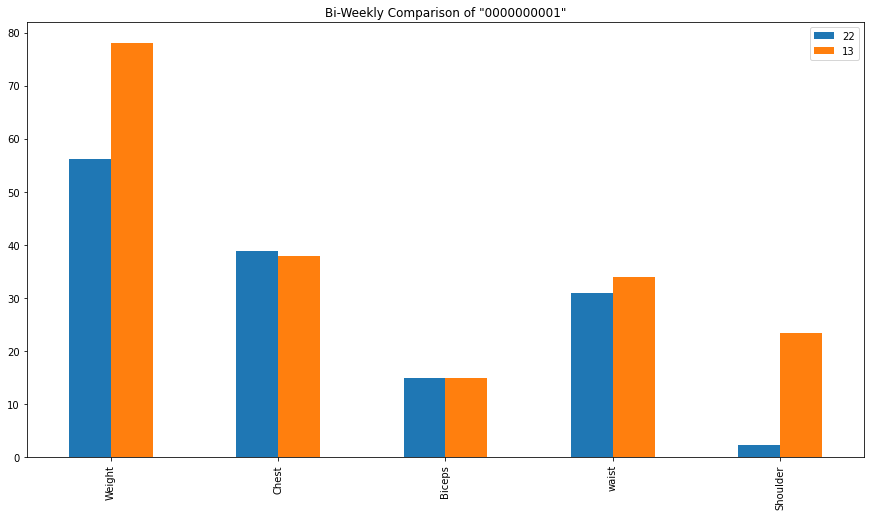

In [39]:
for i in intersection(Old_cust, yest_cust):
    cust_meas = df_all[df_all["Customer_ID"]==i]
    cust_meas.sort_values(by=['Created_date'], inplace=True, ascending=False)
    cust_meas = cust_meas.head(2)
    df_t = cust_meas[["Weight", "Chest", "Biceps", "waist","Shoulder"]]
    df_t = df_t.T
    df_t.plot(kind="bar",figsize=(15, 8))
    plt.title("Bi-Weekly Comparison of "+ i)
    plt.savefig('books_read.png')
    
    message = EmailMessage()
    sender = "riya.kashyap43@yahoo.com"
    recipient = "riya.kashyap0198@gmail.com"
    message['From'] = sender
    message['To'] = recipient
    message['Subject'] = 'Learning to send email from medium.com'
    body = ("""Hello
    I am learning to send emails using Python!!! """+ i)
    message.set_content(body)
    mime_type, _ = mimetypes.guess_type('books_read.png')
    mime_type, mime_subtype = mime_type.split('/')
    with open('books_read.png', 'rb') as file:
        message.add_attachment(file.read(),
        maintype=mime_type,
        subtype=mime_subtype,
        filename='books_read.png')
    mail_server = smtplib.SMTP_SSL('smtp.gmail.com')
    mail_server.set_debuglevel(1)
    mail_server.login("riya.kashyap43@yahoo.com", "Praneeth1415")
    mail_server.send_message(message)
    mail_server.quit()
    
    
    

In [26]:
#df2 = df_old[["Weight", "Chest", "Biceps", "waist","Shoulder"]]
#df2.plot.bar(x=df2,color = df2[['Created by']=='');

In [27]:
cust_meas= cust_meas.head(2)

In [40]:
import smtplib
import mimetypes
from email.message import EmailMessage
message = EmailMessage()
sender = "riya.kashyap43@yahoo.com"
recipient = "riya.kashyap1598@example.com"
message['From'] = sender
message['To'] = recipient
message['Subject'] = 'Learning to send email from medium.com'
body = """Hello
I am learning to send emails using Python!!!"""
message.set_content(body)
mime_type, _ = mimetypes.guess_type('something.pdf')
mime_type, mime_subtype = mime_type.split('/')
with open('notes.pdf', 'rb') as file:
 message.add_attachment(file.read(),
 maintype=mime_type,
 subtype=mime_subtype,
 filename='notes.pdf')
mail_server = smtplib.SMTP_SSL('smtp.gmail.com')
mail_server.set_debuglevel(1)
mail_server.login("riya.kashyap43@yahoo.com", 'Praneeth1415')
mail_server.send_message(message)
mail_server.quit()

send: 'ehlo Riya.phub.net.cable.rogers.com\r\n'
reply: b'250-smtp.gmail.com at your service, [2607:fea8:28c0:8f00:69f2:79c4:f56c:cb00]\r\n'
reply: b'250-SIZE 35882577\r\n'
reply: b'250-8BITMIME\r\n'
reply: b'250-AUTH LOGIN PLAIN XOAUTH2 PLAIN-CLIENTTOKEN OAUTHBEARER XOAUTH\r\n'
reply: b'250-ENHANCEDSTATUSCODES\r\n'
reply: b'250-PIPELINING\r\n'
reply: b'250-CHUNKING\r\n'
reply: b'250 SMTPUTF8\r\n'
reply: retcode (250); Msg: b'smtp.gmail.com at your service, [2607:fea8:28c0:8f00:69f2:79c4:f56c:cb00]\nSIZE 35882577\n8BITMIME\nAUTH LOGIN PLAIN XOAUTH2 PLAIN-CLIENTTOKEN OAUTHBEARER XOAUTH\nENHANCEDSTATUSCODES\nPIPELINING\nCHUNKING\nSMTPUTF8'
send: 'AUTH PLAIN AHJpeWEua2FzaHlhcDQzQHlhaG9vLmNvbQBQcmFuZWV0aDE0MTU=\r\n'
reply: b'535-5.7.8 Username and Password not accepted. Learn more at\r\n'
reply: b'535 5.7.8  https://support.google.com/mail/?p=BadCredentials k12-20020a92c9cc000000b002d1eb84e4fasm613724ilq.83 - gsmtp\r\n'
reply: retcode (535); Msg: b'5.7.8 Username and Password not accepted. 

SMTPAuthenticationError: (535, b'5.7.8 Username and Password not accepted. Learn more at\n5.7.8  https://support.google.com/mail/?p=BadCredentials k12-20020a92c9cc000000b002d1eb84e4fasm613724ilq.83 - gsmtp')